<a href="https://colab.research.google.com/github/hecker1002/ASD_Unsupervised_Subgroup_Discovery/blob/main/GD_From_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [180]:
df = pd.read_csv("/content/houses.csv")



# url = 'https://www.kaggle.com/datasets/ashydv/housing-dataset/data?select=Housing.csv'
# df = pd.read_csv(url, sep=",", encoding="utf-8")



In [26]:
df = df.drop(['bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'] , axis =  1)

In [27]:
df.head()

,price,area,bedrooms
0,13300000,7420,4
1,12250000,8960,4
2,12250000,9960,3
3,12215000,7500,4
4,11410000,7420,4


In [28]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler(  )
sy = preprocessing.MinMaxScaler( )

scaled_x = sx.fit_transform(df.drop('price'  , axis =1 ))
scaled_y = sy.fit_transform( df['price'].values.reshape(df.shape[0] , 1) )

In [33]:
# activation

def Relu( z) :
  return max( 0 , z)

In [62]:
W = np.ones(shape = (2  ))
W

array([1., 1.])

In [92]:
# Batch GD - dataset small , in 1 epoch , takes all training samples , computes loss from ALL of them and then only updates weights during backpropogation .

def batch_gradient_descent( X , y_true , epochs , rate ) :
  n = X.shape[0] # rows
  num_features = X.shape[1] # columns

  # initialize random weights and biases for neural network

  W = np.ones(shape = (num_features )) # its a flat ( 1D array , since no comma used ) of size  = 1 x 2
  bias = 0
  loss = 0

  cost_list = []
  epoch_list = []

  # in1  epoch , take all training samples , compute loss and update weights

  # assume , NN has only 1 neuron = (weihted sum -> activation )

  for i in range(epochs) :


    y_pred = np.dot(W , X.T )  + bias  # weighted sum + bias

    # for a regression task , avoid activation (in Output LAyer) , but actiavtion in hidden layers is necessary to fit a non-linear model on real-world data

    # we are NOT usig another for loop inside this epoch loop  to go througha ll training samples as this job is already done by - np
    # where X = not a single data point , but all the data points together

    # d(loss)/ d(w1) = -2/n * Summ(x_i * (y_i - y_i_pred))  -> remeer the negative value

    dL_dw = -(1/ n) * (X.T .dot( y_true - y_pred) )  # y_true =  is 1 column vector and y_pred= 1 row vector , so while calling the func , conveet y_true in 1 D array
    dL_db = -(1/ n) * np.sum( y_true - y_pred )  # bias updated value decided by all weights cummulatively

    # Use geenral GD  algo.

    W = W - rate*(dL_dw)
    bias = bias - rate*(dL_db)

    # calculate actual loss in this epoch , due to which weights were adjusted

    loss =  np.mean (    np.square (y_true - y_pred ) )  # loss = MSE = (y_true - y_pred ) ^ 2

    # plot the cost v/s epoch graph to compare diff. GD algo  .

    if i%10 ==0 :
      cost_list.append(loss )
      epoch_list.append(i)


  return W , bias , loss  , cost_list , epoch_list


# here , NN has ONLY 1 neuron with 2 weights ( 2 features) that predicts a continuous value



# Niw , our Neural Network of 1 neuron is ready ( using BGD)


In [93]:
w , bias , loss , cost_list , epoch_list = batch_gradient_descent(scaled_x , scaled_y.reshape(scaled_y.shape[0]) , 500 , 0.01 )  # here , y becomes a flat array 1D array ( 1 x n )



In [98]:
w[0] , w[1]

(0.8812779177601352, 0.8239636922895498)

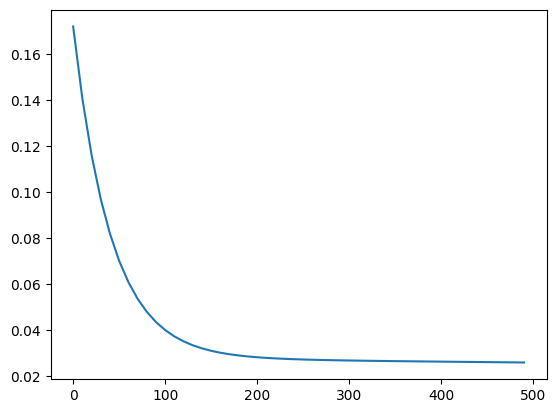

In [96]:
# cost v/s epoch - in batch gradient descent algo .

plt.plot(epoch_list , cost_list )
plt.show()

In [101]:
def predict_bgd(area , bedroom  ) :
  scale_x = sx.transform([ [ area , bedroom ] ] )[0] # since it return a 2D array

  y_pred_scaled = w[0]*scale_x[0] + w[1]*scale_x[1] + bias # ita a value that has been scaled

  # Use inverse scaler to cancel the effect of scaling and return the original price


  return sy.inverse_transform( [[ y_pred_scaled ] ] )

In [105]:
print(predict_bgd(9000 , 4)[0][0])


9370994.164022017


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [148]:
# Stochastic GD  - it takes randomly a single training samle in each epoch and updates the weight in same epoch and then moves to next training sample / epoch


def stoch_gradient_descent( X , y_true , epochs , rate ) :
  n = X.shape[0] # rows
  num_features = X.shape[1] # columns

  # initialize random weights and biases for neural network

  W = np.ones(shape = (num_features )) # its a flat ( 1D array , since no comma used ) of size  = 1 x 2
  bias = 0
  loss = 0

  cost_list = []
  epoch_list = []

  for i in range(epochs) :

    # randomly pick a training sample from 0 to (total_samples )
    rand_row = random.randint(0 , n-1 )



    y_pred = np.dot(W , X[rand_row].T )  + bias # compute wrt random X , corresponding random Y

    dL_dw = -(1/ n) * (X[rand_row].T .dot( y_true[rand_row] - y_pred) )  # y_true =  is 1 column vector and y_pred= 1 row vector , so while calling the func , conveet y_true in 1 D array
    dL_db = -(1/ n) * np.sum( y_true[rand_row] - y_pred )  # bias updated value decided by all weights cummulatively

    # Use geenral GD  algo.

    W = W - rate*(dL_dw)
    bias = bias - rate*(dL_db)

    # calculate actual loss in this epoch , due to which weights were adjusted

    loss =  np.mean (    np.square (y_true[rand_row ] - y_pred ) )  # loss = MSE = (y_true - y_pred ) ^ 2

    # plot the cost v/s epoch graph to compare diff. GD algo  .

    if i%10 ==0 :
      cost_list.append(loss )
      epoch_list.append(i)


  return W , bias , loss  , cost_list , epoch_list








In [149]:
w1, bias1 , loss1 , cost_list1 , epoch_list1 = stoch_gradient_descent(scaled_x , scaled_y.reshape(scaled_y.shape[0]) , 1000 , 0.01 )  # here , y becomes a flat array 1D array ( 1 x n )
w1


array([0.99814759, 0.99699652])

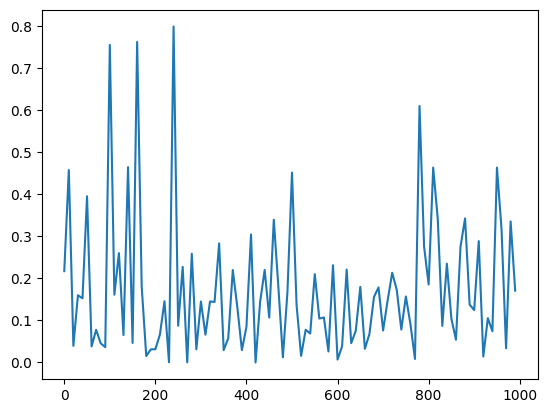

In [128]:
# cost v/s epoch - in stochastic gradient descent algo .

plt.plot(epoch_list1 , cost_list1 )
plt.show()

In [132]:
def predict_sgd(area , bedroom  ) :
  scale_x = sx.transform([ [ area , bedroom ] ] )[0] # since it return a 2D array

  y_pred_scaled = w1[0]*scale_x[0] + w1[1]*scale_x[1] + bias1 # ita a value that has been scaled

  # Use inverse scaler to cancel the effect of scaling and return the original price


  return sy.inverse_transform( [[ y_pred_scaled ] ] )

In [133]:
predict_sgd(9000 , 4)[0][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


14406898.63265911

In [171]:
# MIni Batch GD  - it takes randomly a batch (collection) training samle in each epoch and updates the weight in same epoch after computing loss from whole of that batch  and then moves to next training sample / epoch


def mini_batch_gradient_descent( X , y_true , epochs , rate , batch_size  ) :
  n = X.shape[0] # rows
  num_features = X.shape[1] # columns

  # initialize random weights and biases for neural network

  W = np.ones(shape = (num_features )) # its a flat ( 1D array , since no comma used ) of size  = 1 x 2
  bias = 0
  loss = 0

  cost_list = []
  epoch_list = []

  for i in range(epochs) :

    # randomly pick a training sample from 0 to (total_samples )
    rand_indices = np.random.permutation(n)

    X_tmp = X[rand_indices]
    y_tmp = y_true[rand_indices]

    for j in range(0,n,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]

            y_pred = np.dot(W , Xj.T )  + bias # compute wrt random X , corresponding random Y

            dL_dw = -(1/ n) * (Xj.T .dot( yj - y_pred) )  # y_true =  is 1 column vector and y_pred= 1 row vector , so while calling the func , conveet y_true in 1 D array
            dL_db = -(1/ n) * np.sum( yj - y_pred )  # bias updated value decided by all weights cummulatively

    # Use geenral GD  algo.

            W = W - rate*(dL_dw)
            bias = bias - rate*(dL_db)

    # calculate actual loss in this epoch , due to which weights were adjusted

            loss =  np.mean (    np.square (yj - y_pred ) )  # loss = MSE = (y_true - y_pred ) ^ 2




    # plot the cost v/s epoch graph to compare diff. GD algo  .

    if i%10 ==0 :
      cost_list.append(loss )
      epoch_list.append(i)


  return W , bias , loss  , cost_list , epoch_list








In [174]:
w2, bias2 , loss2 , cost_list2 , epoch_list2 = mini_batch_gradient_descent(scaled_x , scaled_y.reshape(scaled_y.shape[0]) , 1000 , 0.01 , 5 )  # here , y becomes a flat array 1D array ( 1 x n )



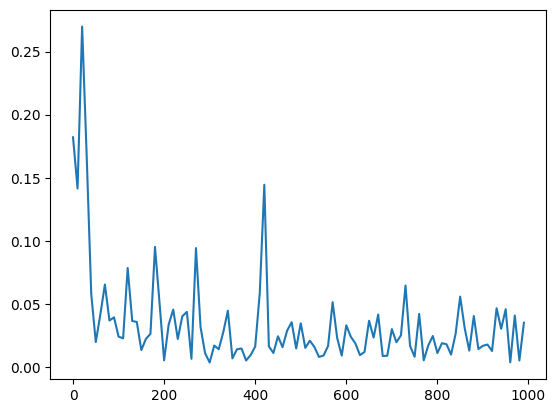

In [175]:
# cost v/s epoch - in stochastic gradient descent algo .

plt.plot(epoch_list2, cost_list2 )
plt.show()